In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(16,9)})

In [2]:
# load the experiments
experiments = pd.read_csv("../results/experiments.csv")
experiments.head(90)

,F_priority_scheme,F_number_of_agents,F_SLA,days,startdate,service_level,repetition,RUN,Done,Finished_at,...,all_avg_initial_delay,all_avg_activity_start_delay,all_avg_duration_delayed,cases_arrived,cases_closed,case_queued,cases_assigned,min_tracelen,max_tracelen,Simulation_duration_min
0,FCFS,5,SLA,365,2018-07-01,3.0,1,0,1,2023-01-21 00:55:31,...,51.243832,0.404080,0.404080,722.0,494.0,223.0,498.0,1.0,12.0,4.293691
1,SRTF,5,SLA,365,2018-07-01,3.0,1,1,1,2023-01-21 00:59:26,...,50.361790,0.416079,0.416079,686.0,495.0,182.0,499.0,1.0,13.0,3.911152
2,LRTF,5,SLA,365,2018-07-01,3.0,1,2,1,2023-01-21 01:05:35,...,58.215815,0.422428,0.422428,724.0,484.0,235.0,488.0,1.0,12.0,6.150419
3,NPS,5,SLA,365,2018-07-01,3.0,1,3,1,2023-01-21 01:12:37,...,61.594909,0.428656,0.428656,681.0,485.0,189.0,488.0,1.0,13.0,7.044494
4,FCFS,6,SLA,365,2018-07-01,3.0,1,4,1,2023-01-21 01:16:53,...,49.014777,0.424203,0.424203,788.0,577.0,205.0,581.0,1.0,13.0,4.257157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,SRTF,15,NO_SLA,365,2018-07-01,3.0,1,85,1,2023-01-21 03:36:25,...,0.544420,0.434607,0.434607,712.0,701.0,0.0,708.0,1.0,17.0,0.889418
86,LRTF,15,NO_SLA,365,2018-07-01,3.0,1,86,1,2023-01-21 03:37:18,...,0.645922,0.443134,0.443134,703.0,693.0,0.0,700.0,1.0,14.0,0.890283
87,NPS,15,NO_SLA,365,2018-07-01,3.0,1,87,1,2023-01-21 03:38:21,...,0.576921,0.435274,0.435274,715.0,705.0,0.0,713.0,1.0,15.0,1.048050
88,FCFS,5,SLA,365,2018-07-01,3.0,2,88,1,2023-01-21 03:42:42,...,59.836947,0.408255,0.408255,714.0,492.0,217.0,495.0,1.0,13.0,4.349209


In [3]:
# subset
#experiments = experiments.loc[experiments.repetition < 2]
#experiments = experiments.loc[experiments.F_SLA == "SLA"]

In [3]:
experiments.loc[0].to_dict()

{'F_priority_scheme': 'FCFS',
 'F_number_of_agents': 5,
 'F_SLA': 'SLA',
 'days': 365,
 'startdate': '2018-07-01',
 'service_level': 3.0,
 'repetition': 1,
 'RUN': 0,
 'Done': 1,
 'Finished_at': '2023-01-21 00:55:31',
 'closed_avg_simulated_NPS': 8.812069892706432,
 'closed_avg_simulated_throughput_time': 55.269346360643375,
 'closed_avg_predicted_NPS': 10.133456518640855,
 'closed_avg_predicted_throughput_time': 1.6159676382777008,
 'closed_avg_predicted_NPS_priority': 2.633456518640892,
 'closed_avg_initial_delay': 51.62624866733784,
 'closed_avg_activity_start_delay': 0.4026645373970179,
 'closed_avg_duration_delayed': 0.4026645373970179,
 'all_avg_simulated_NPS': 8.800389802031257,
 'all_avg_simulated_throughput_time': 55.72528309888335,
 'all_avg_predicted_NPS': 10.13307129932212,
 'all_avg_predicted_throughput_time': 1.6289180598803017,
 'all_avg_predicted_NPS_priority': 2.633071299322161,
 'all_avg_initial_delay': 51.24383201054275,
 'all_avg_activity_start_delay': 0.40408011679

# Research question
- What is the optimal trade-off between minimal SLA-violations and maximal resource utilization for each of the priority-schemes?


In [5]:
SLA = 3

## Min-max problem
Pick the point(solution) with the _lowest_ value for X, and  _highest_ value for Y, assuming they weigh equally in importance

*Objectives*
- Minimize X (SLA violations)
- Maximize Y (Agent utilization)

(Changing sign for minimization)

*Objective function:*

$max (Z) = +X -Y$

# Research question
- What is the optimal trade-off between minimal SLA-violations and maximal resource utilization for each of the priority-schemes?


In [6]:
SLA = 3

## Min-max problem
Pick the point(solution) with the _lowest_ value for X, and  _highest_ value for Y, assuming they weigh equally in importance

*Objectives*
- Minimize X (SLA violations)
- Maximize Y (Agent utilization)

(Changing sign for minimization)

*Objective function:*

$max (Z) = +X -Y$

# Routine for all priority schemes
Loop over all experiments and find the best number of agents per priority_scheme via majority-voting

In [7]:
results = []

#go over all experiments
for run in experiments.RUN:
    scheme_by_agents = experiments.loc[run,"F_priority_scheme"] + "_" + experiments.loc[run,"F_number_of_agents"].astype(str)   #+"_"+experiments.loc[run,"F_SLA"] 
    
    # load experiment i
    run_i = pd.read_csv("../results/"+str(run)+"_timeseries.csv")
    
    """
    Find violations
    """
    run_i["SLA_violation"] = (run_i["max_current_queue_waitingtime"] > SLA)*1
    SLA_violations = np.sum(run_i["SLA_violation"])
    
    #agent utilization:
    Mean_agent_utilization_perc = np.mean(run_i["n_busy_agents"]/run_i["n_agents"])
    
        
    res_i = pd.DataFrame({"RUN":run,
                          "replication":experiments.loc[run,"repetition"],
                           "discipline":experiments.loc[run,"F_priority_scheme"],
                           "scheme":scheme_by_agents,
                           "SLA":experiments.loc[run,"F_SLA"],
                           "Days":len(run_i),
                           "agents":experiments.loc[run,"F_number_of_agents"],
                           "SLA_violations":SLA_violations,
                           "Min_active_agents":np.min(run_i["n_busy_agents"]),
                           "Max_active_agents":np.max(run_i["n_busy_agents"]),
                           "Mean_active_agents":np.mean(run_i["n_busy_agents"]),
                           "Mean_agent_utilization_perc":Mean_agent_utilization_perc},
                         index=[run])
    
    results.append(res_i)
    
results = pd.concat(results)
results

,RUN,replication,discipline,scheme,SLA,Days,agents,SLA_violations,Min_active_agents,Max_active_agents,Mean_active_agents,Mean_agent_utilization_perc
0,0,1,FCFS,FCFS_5,SLA,90,5,51,0,5,4.544444,0.908889
1,1,1,SRTF,SRTF_5,SLA,90,5,56,0,5,4.866667,0.973333
2,2,1,LRTF,LRTF_5,SLA,90,5,62,0,5,4.566667,0.913333
3,3,1,NPS,NPS_5,SLA,90,5,82,0,5,4.855556,0.971111
4,4,1,FCFS,FCFS_6,SLA,90,6,72,0,6,5.688889,0.948148
...,...,...,...,...,...,...,...,...,...,...,...,...
83,83,1,NPS,NPS_14,NO_SLA,90,14,0,0,11,4.766667,0.340476
84,84,1,FCFS,FCFS_15,NO_SLA,90,15,0,0,11,5.466667,0.364444
85,85,1,SRTF,SRTF_15,NO_SLA,90,15,0,0,13,5.655556,0.377037
86,86,1,LRTF,LRTF_15,NO_SLA,90,15,0,0,12,4.877778,0.325185


In [8]:
def range_transform(q):
    #get values
    q_min = np.min(q)
    q_max = np.max(q)
    
    #transform
    q = (q - q_min)/(q_max -q_min)    
    return q, q_min, q_max

def range_transform_back(q, q_min, q_max):    
    #transform back
    q = (q * (q_max -q_min)) +q_min    
    return q

In [9]:
def objective(data, ratio=0.5):    
    fitness = np.sum([-data.X*ratio, +data.Y*(1-ratio)])    
    return fitness

In [10]:
results.sort_values("discipline")

,RUN,replication,discipline,scheme,SLA,Days,agents,SLA_violations,Min_active_agents,Max_active_agents,Mean_active_agents,Mean_agent_utilization_perc
0,0,1,FCFS,FCFS_5,SLA,90,5,51,0,5,4.544444,0.908889
48,48,1,FCFS,FCFS_6,NO_SLA,90,6,67,0,6,5.733333,0.955556
56,56,1,FCFS,FCFS_8,NO_SLA,90,8,17,0,8,6.500000,0.812500
44,44,1,FCFS,FCFS_5,NO_SLA,90,5,78,0,5,4.822222,0.964444
40,40,1,FCFS,FCFS_15,SLA,90,15,0,0,12,5.833333,0.388889
...,...,...,...,...,...,...,...,...,...,...,...,...
29,29,1,SRTF,SRTF_12,SLA,90,12,0,0,12,6.144444,0.512037
65,65,1,SRTF,SRTF_10,NO_SLA,90,10,1,0,10,6.655556,0.665556
61,61,1,SRTF,SRTF_9,NO_SLA,90,9,0,0,9,5.933333,0.659259
17,17,1,SRTF,SRTF_9,SLA,90,9,3,0,9,6.433333,0.714815


In [11]:
optimal_solutions = []

disciplines = results.discipline.unique().tolist()
service_level = results.SLA.unique().tolist() #["SLA","NO_SLA"]
replications = results.replication.unique().tolist() #[1,2,3,4,5]

# for all replications
for rep in replications:
    print(rep)
    
    #subset by replication
    sub_rep = results.loc[results.replication == rep]
    print(len(sub_rep))

    # for all disciplines
    for discipline in disciplines:
        print(discipline)

        #subset by discipline
        sub_disc = sub_rep.loc[sub_rep.discipline == discipline]

        # for all types of service level
        for service in service_level:
            print(service)

            #subset the data further
            sub = sub_disc.loc[sub_disc.SLA == service]

            """
            perform the analysis on the subset of the results
            """

            data = sub[["SLA_violations","Mean_agent_utilization_perc"]]
            data.columns = ["X","Y"]

            # range normalize
            data["X"], x_min, x_max = range_transform(data["X"])
            data["Y"], y_min, y_max = range_transform(data["Y"])

            # placeholder
            solutions = []

            # rank the solutions based on max fit     
            for i in data.index:
                #evaluate solution i
                fit = objective(data.loc[i], ratio=0.5)

                fit_i = pd.DataFrame({"x":data.loc[i,"X"],
                                       "y":data.loc[i,"Y"],
                                       "fit":fit},
                                       index=[i])

                solutions.append(fit_i)

            solutions = pd.concat(solutions)

            # sort the solutions: descending for maximization
            solutions = solutions.sort_values("fit", ascending=False)
            solutions.index = list(range(0,len(solutions)))

            # scale back to original range
            solutions["x"] = range_transform_back(solutions["x"], x_min, x_max)
            solutions["y"] = range_transform_back(solutions["y"], y_min, y_max)
            print(solutions)

            # get the single best solution
            optimal_SLA = solutions.loc[0, "x"]
            optimal_utility = solutions.loc[0,"y"]
            fit = solutions.loc[0,"fit"]

            #lookup details of the best solution
            solution_i = sub.loc[(sub["SLA_violations"]  == optimal_SLA) & (sub["Mean_agent_utilization_perc"] == optimal_utility)]
            #print(solution_i)

            """
            append the result
            """
            solution_i["fitness"] = fit
            optimal_solutions.append(solution_i)
        
optimal_solutions = pd.concat(optimal_solutions)

1
88
FCFS
SLA
       x         y       fit
0    0.0  0.672840  0.261315
1   29.0  0.890476  0.248611
2    0.0  0.655556  0.246330
3    6.0  0.662500  0.210684
4    0.0  0.503030  0.114095
5   51.0  0.908889  0.111797
6    0.0  0.399145  0.024030
7    0.0  0.388889  0.015138
8    0.0  0.387963  0.014335
9   72.0  0.948148  0.000000
10   0.0  0.371429  0.000000
NO_SLA
       x         y       fit
0   17.0  0.812500  0.264405
1    0.0  0.680952  0.263757
2    2.0  0.693827  0.261665
3    0.0  0.534444  0.141667
4    0.0  0.500926  0.113735
5    0.0  0.483838  0.099495
6    0.0  0.445299  0.067379
7   67.0  0.955556  0.063105
8    0.0  0.432540  0.056746
9   78.0  0.964444  0.000000
10   0.0  0.364444  0.000000
SRTF
SLA
       x         y       fit
0    3.0  0.714815  0.261750
1    0.0  0.680556  0.253018
2    0.0  0.633333  0.213778
3    0.0  0.593333  0.180540
4   56.0  0.973333  0.127886
5    0.0  0.512037  0.112985
6    0.0  0.451852  0.062973
7    0.0  0.413492  0.031098
8   71.0  0.9

C:\Users\Mike\AppData\Local\Temp\ipykernel_37164\3928770249.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["X"], x_min, x_max = range_transform(data["X"])
C:\Users\Mike\AppData\Local\Temp\ipykernel_37164\3928770249.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Y"], y_min, y_max = range_transform(data["Y"])
C:\Users\Mike\AppData\Local\Temp\ipykernel_37164\3928770249.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

# Inspect results

In [12]:
# Solutions are left out if they are NaN

In [13]:
optimal_solutions.sort_values(["replication","SLA","discipline","agents"])

,RUN,replication,discipline,scheme,SLA,Days,agents,SLA_violations,Min_active_agents,Max_active_agents,Mean_active_agents,Mean_agent_utilization_perc,fitness
56,56,1,FCFS,FCFS_8,NO_SLA,90,8,17,0,8,6.500000,0.812500,0.264405
58,58,1,LRTF,LRTF_8,NO_SLA,90,8,6,0,8,6.544444,0.818056,0.343636
63,63,1,NPS,NPS_9,NO_SLA,90,9,1,0,9,6.544444,0.727160,0.299483
57,57,1,SRTF,SRTF_8,NO_SLA,90,8,1,0,8,5.411111,0.676389,0.253548
16,16,1,FCFS,FCFS_9,SLA,90,9,0,0,9,6.055556,0.672840,0.261315
23,23,1,NPS,NPS_10,SLA,90,10,0,0,10,6.455556,0.645556,0.228368
17,17,1,SRTF,SRTF_9,SLA,90,9,3,0,9,6.433333,0.714815,0.261750


Text(0.5, 1.0, 'Frequency of optimal number of agents')

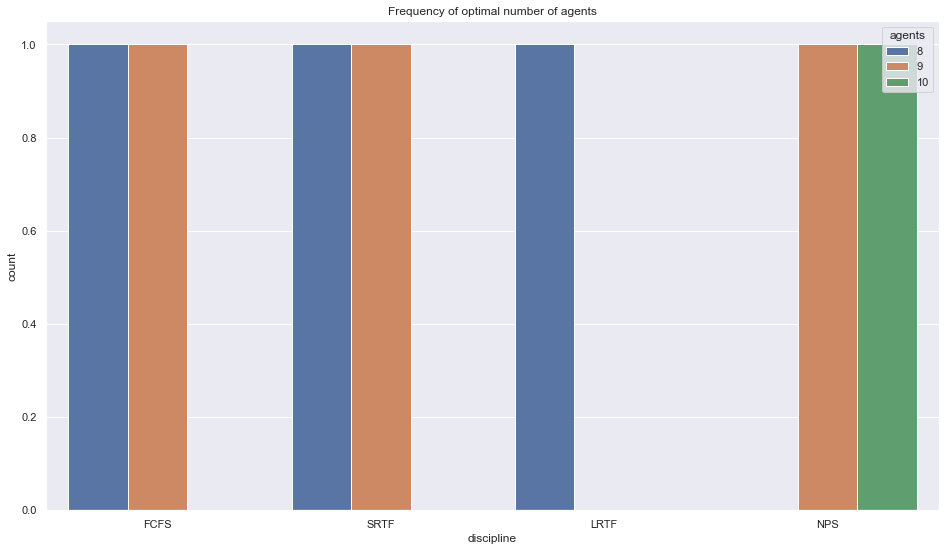

In [14]:
sns.countplot(data=optimal_solutions, x="discipline", hue="agents")
plt.title("Frequency of optimal number of agents")

In [15]:
"""
Potential problem (1): 
Every experiment is normalized based on the range within that experiment, 
which means that the range-normalized results cannot be compared across runs 1:1

    Potential solution:
    - normalize using global min and max values

Potential problem (2): 
Some solutions are not stored in the 'optimal_solutions' object, due to a lookup error. 

    Potential solution:
    - store the RUN id together with fitness value

"""

'\nPotential problem: every experiment is normalized based on the range within that experiment, \nwhich means that the range-normalized results cannot be compared across runs 1:1\n\nPotential solution:\n- normalize using global min and max values\n'